In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS
import re
import seaborn as sns
import spacy
from textblob import TextBlob
from tqdm import tqdm_notebook
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [2]:
#!pip install textblob tdm

### **Loading the Amazon product reviews data**

In [3]:
data = pd.read_csv("reviews.csv")
data


Reviewer Name                                            Reviews
0   Shokeenism Reviews  I brought this boat wireless headphones multip...
1      Amazon Customer  Overall an excellent product at this price. Wh...
2   Shokeenism Reviews  full marks to sound quality.Dual connectivity ...
3                   RK  GOOD PRODUCT BUT EVERYONE CANT BEAR TO USE IN ...
4        Brijesh Mehta  I'm writing this review after using the produc...
..                 ...                                                ...
85                Anil                    Bahut sundar he aur acha bhi he
86      Ramesh Salokhe                            Nice sound and durable.
87         G. Santoshi                                           Delicate
88               rohan                        Working really well for me.
89               rohan  This earphone is good and perfect if you are s...

[90 rows x 2 columns]

### Replace NaN values with an empty string

In [4]:
data['Reviews'] = data['Reviews'].fillna('')
data

Reviewer Name                                            Reviews
0   Shokeenism Reviews  I brought this boat wireless headphones multip...
1      Amazon Customer  Overall an excellent product at this price. Wh...
2   Shokeenism Reviews  full marks to sound quality.Dual connectivity ...
3                   RK  GOOD PRODUCT BUT EVERYONE CANT BEAR TO USE IN ...
4        Brijesh Mehta  I'm writing this review after using the produc...
..                 ...                                                ...
85                Anil                    Bahut sundar he aur acha bhi he
86      Ramesh Salokhe                            Nice sound and durable.
87         G. Santoshi                                           Delicate
88               rohan                        Working really well for me.
89               rohan  This earphone is good and perfect if you are s...

[90 rows x 2 columns]

#### **Convert all reviews to lowercase**

In [5]:
data['Reviews'] = data['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data

Reviewer Name                                            Reviews
0   Shokeenism Reviews  i brought this boat wireless headphones multip...
1      Amazon Customer  overall an excellent product at this price. wh...
2   Shokeenism Reviews  full marks to sound quality.dual connectivity ...
3                   RK  good product but everyone cant bear to use in ...
4        Brijesh Mehta  i'm writing this review after using the produc...
..                 ...                                                ...
85                Anil                    bahut sundar he aur acha bhi he
86      Ramesh Salokhe                            nice sound and durable.
87         G. Santoshi                                           delicate
88               rohan                        working really well for me.
89               rohan  this earphone is good and perfect if you are s...

[90 rows x 2 columns]

#### **Remove punctuation marks**

In [6]:
data['Reviews'] = data['Reviews'].str.replace('[^\w\s]','', regex=True)
data

Reviewer Name                                            Reviews
0   Shokeenism Reviews  i brought this boat wireless headphones multip...
1      Amazon Customer  overall an excellent product at this price wha...
2   Shokeenism Reviews  full marks to sound qualitydual connectivity i...
3                   RK  good product but everyone cant bear to use in ...
4        Brijesh Mehta  im writing this review after using the product...
..                 ...                                                ...
85                Anil                    bahut sundar he aur acha bhi he
86      Ramesh Salokhe                             nice sound and durable
87         G. Santoshi                                           delicate
88               rohan                         working really well for me
89               rohan  this earphone is good and perfect if you are s...

[90 rows x 2 columns]

#### **Remove stop words**

In [7]:
stop_words = set(STOPWORDS)
data['Reviews'] = data['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
data

Reviewer Name                                            Reviews
0   Shokeenism Reviews  brought boat wireless headphones multiple time...
1      Amazon Customer  overall excellent product price love dual pari...
2   Shokeenism Reviews  full marks sound qualitydual connectivity plus...
3                   RK  good product everyone cant bear use warm weath...
4        Brijesh Mehta  im writing review using product 10 mnthsprosth...
..                 ...                                                ...
85                Anil                          bahut sundar aur acha bhi
86      Ramesh Salokhe                                 nice sound durable
87         G. Santoshi                                           delicate
88               rohan                                working really well
89               rohan  earphone good perfect searching ofr durable be...

[90 rows x 2 columns]

#### **Number of characters**

In [8]:
data['char_count'] = data['Reviews'].str.len() 
data[['Reviews','char_count']].head()

Reviews  char_count
0  brought boat wireless headphones multiple time...         614
1  overall excellent product price love dual pari...         263
2  full marks sound qualitydual connectivity plus...         113
3  good product everyone cant bear use warm weath...          77
4  im writing review using product 10 mnthsprosth...         255

#### **Average Word Length**

In [9]:
def avg_word(sentence):
    words = str(sentence).split()
    if len(words) == 0:
        return 0  # or any other default value you prefer
    else:
        return sum(len(word) for word in words) / len(words)

data['avg_word'] = data['Reviews'].apply(lambda x: avg_word(x))
data[['Reviews','avg_word']].head()

Reviews  avg_word
0  brought boat wireless headphones multiple time...  7.661972
1  overall excellent product price love dual pari...  6.135135
2  full marks sound qualitydual connectivity plus...  6.600000
3  good product everyone cant bear use warm weath...  5.000000
4  im writing review using product 10 mnthsprosth...  6.314286

#### **CountVectorizer with N-grams (Bigrams & Trigrams)**

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(data))):
    review = re.sub('[^a-zA-Z]', ' ', data['Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91814\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\91814\AppData\Local\Temp\ipykernel_3264\3634328490.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0, len(data))):


  0%|          | 0/90 [00:00<?, ?it/s]

In [11]:
corpus[3]

'good product everyon cant bear use warm weather n dipper night distrb col'

#### **Applying Countvectorizer**
Creating the Bag of Words model

In [12]:
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [13]:
X.shape

(90, 2326)

In [14]:
cv.get_feature_names()[:20]

C:\Users\91814\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aachi',
 'aachi thi',
 'aachi thi baad',
 'aayi',
 'aayi aachi',
 'aayi aachi thi',
 'ab',
 'ab thik',
 'ab thik hai',
 'abil',
 'abil connect',
 'abil connect rockerz',
 'accept',
 'accept sound',
 'accept sound qualiti',
 'accord',
 'accord price',
 'acha',
 'acha bhi',
 'acha laga']

In [15]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [16]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names())
count_df

aachi  aachi thi  aachi thi baad  aayi  aayi aachi  aayi aachi thi  ab  \
0       0          0               0     0           0               0   0   
1       0          0               0     0           0               0   0   
2       0          0               0     0           0               0   0   
3       0          0               0     0           0               0   0   
4       0          0               0     0           0               0   0   
..    ...        ...             ...   ...         ...             ...  ..   
85      0          0               0     0           0               0   0   
86      0          0               0     0           0               0   0   
87      0          0               0     0           0               0   0   
88      0          0               0     0           0               0   0   
89      0          0               0     0           0               0   0   

    ab thik  ab thik hai  abil  ...  write review use  ye  ye may  \
0         0            0     0  ...                 0   0       0   
1         0            0     0  ...                 0   0       0   
2         0            0     0  ...                 0   0       0   
3         0            0     0  ...                 0   0       0   
4         0            0     0  ...                 1   0       0   
..      ...          ...   ...  ...               ...  ..     ...   
85        0            0     0  ...                 0   0       0   
86        0            0     0  ...                 0   0       0   
87        0            0     0  ...                 0   0       0   
88        0            0     0  ...                 0   0       0   
89        0            0     0  ...                 0   0       0   

    ye may consid  yeah  yeah love  yeah love far  youbut  youbut buy  \
0               0     0          0              0       0           0   
1               0     0          0              0       0           0   
2               0     0          0              0       0           0   
3               0     0          0              0       0           0   
4               0     0          0              0       0           0   
..            ...   ...        ...            ...     ...         ...   
85              0     0          0              0       0           0   
86              0     0          0              0       0           0   
87              0     0          0              0       0           0   
88              0     0          0              0       0           0   
89              0     0          0              0       0           0   

    youbut buy listen  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
..                ...  
85                  0  
86                  0  
87                  0  
88                  0  
89                  0  

[90 rows x 2326 columns]

#### **TF-IDF Vectorizer**

In [17]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(data))):
    review = re.sub('[^a-zA-Z]', ' ', data['Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

C:\Users\91814\AppData\Local\Temp\ipykernel_3264\622801821.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0, len(data))):


  0%|          | 0/90 [00:00<?, ?it/s]

In [18]:
corpus[4]

'im write review use product mnthsprosth bass product realli impress budgetyoul auto magnet touch onoff switchiv use product rain still workingth sound qualiti impress good soni thoughconsth speaker band call give littl bit issu'

#### **TFidf Vectorizer**

In [19]:
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [20]:
X.shape

(90, 2326)

In [21]:
tfidf_v.get_feature_names()[:20]

C:\Users\91814\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aachi',
 'aachi thi',
 'aachi thi baad',
 'aayi',
 'aayi aachi',
 'aayi aachi thi',
 'ab',
 'ab thik',
 'ab thik hai',
 'abil',
 'abil connect',
 'abil connect rockerz',
 'accept',
 'accept sound',
 'accept sound qualiti',
 'accord',
 'accord price',
 'acha',
 'acha bhi',
 'acha laga']

In [22]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [23]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names())
count_df


aachi  aachi thi  aachi thi baad  aayi  aayi aachi  aayi aachi thi   ab  \
0     0.0        0.0             0.0   0.0         0.0             0.0  0.0   
1     0.0        0.0             0.0   0.0         0.0             0.0  0.0   
2     0.0        0.0             0.0   0.0         0.0             0.0  0.0   
3     0.0        0.0             0.0   0.0         0.0             0.0  0.0   
4     0.0        0.0             0.0   0.0         0.0             0.0  0.0   
..    ...        ...             ...   ...         ...             ...  ...   
85    0.0        0.0             0.0   0.0         0.0             0.0  0.0   
86    0.0        0.0             0.0   0.0         0.0             0.0  0.0   
87    0.0        0.0             0.0   0.0         0.0             0.0  0.0   
88    0.0        0.0             0.0   0.0         0.0             0.0  0.0   
89    0.0        0.0             0.0   0.0         0.0             0.0  0.0   

    ab thik  ab thik hai  abil  ...  write review use   ye  ye may  \
0       0.0          0.0   0.0  ...          0.000000  0.0     0.0   
1       0.0          0.0   0.0  ...          0.000000  0.0     0.0   
2       0.0          0.0   0.0  ...          0.000000  0.0     0.0   
3       0.0          0.0   0.0  ...          0.000000  0.0     0.0   
4       0.0          0.0   0.0  ...          0.103749  0.0     0.0   
..      ...          ...   ...  ...               ...  ...     ...   
85      0.0          0.0   0.0  ...          0.000000  0.0     0.0   
86      0.0          0.0   0.0  ...          0.000000  0.0     0.0   
87      0.0          0.0   0.0  ...          0.000000  0.0     0.0   
88      0.0          0.0   0.0  ...          0.000000  0.0     0.0   
89      0.0          0.0   0.0  ...          0.000000  0.0     0.0   

    ye may consid  yeah  yeah love  yeah love far  youbut  youbut buy  \
0             0.0   0.0        0.0            0.0     0.0         0.0   
1             0.0   0.0        0.0            0.0     0.0         0.0   
2             0.0   0.0        0.0            0.0     0.0         0.0   
3             0.0   0.0        0.0            0.0     0.0         0.0   
4             0.0   0.0        0.0            0.0     0.0         0.0   
..            ...   ...        ...            ...     ...         ...   
85            0.0   0.0        0.0            0.0     0.0         0.0   
86            0.0   0.0        0.0            0.0     0.0         0.0   
87            0.0   0.0        0.0            0.0     0.0         0.0   
88            0.0   0.0        0.0            0.0     0.0         0.0   
89            0.0   0.0        0.0            0.0     0.0         0.0   

    youbut buy listen  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
..                ...  
85                0.0  
86                0.0  
87                0.0  
88                0.0  
89                0.0  

[90 rows x 2326 columns]

#### **Named Entity Recognition (NER)**

In [24]:
reviews=[data.strip() for data in data.Reviews] # remove both the leading and the trailing characters
reviews=[Reviews for Reviews in reviews if Reviews] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'brought boat wireless headphones multiple times headphones fantastic worth money pros cons headphonesprosthe sound quality amazinglong battery backupcompatible bluetooth devicescan connect two devices simultaneouslymultidevice connecting featurenoise cancellation amazingfast charging takes almost half hour charge battery fullylast least water resistantconscan cause ear pain longtime continuous usecome ear running exercisingsometimes disconnects automatically connects automaticallyso pros cons boats bluetooth earphones using earphones long time review hope will find helpful dont forget follow product reviews overall excellent product price love dual paring stays connected 2 device time earlier used apple airpods automatically switches device per need using neckband really missing airpods switches automatically one star less ear buds little uncomfortable prolonged use full marks sound qualitydual connectivity plusmagnets great wont pause play magnatestoo bulky heavy compare peers good p

In [26]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 12.8/12.8 MB 5.0 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [27]:
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [28]:
for token in doc_block[:50]:
    print(token,token.pos_)  

brought VERB
boat NOUN
wireless NOUN
headphones NOUN
multiple ADJ
times NOUN
headphones VERB
fantastic ADJ
worth ADJ
money NOUN
pros NOUN
cons VERB
headphonesprosthe PROPN
sound PROPN
quality PROPN
amazinglong PROPN
battery PROPN
backupcompatible NOUN
bluetooth PROPN
devicescan PROPN
connect VERB
two NUM
devices NOUN
simultaneouslymultidevice NOUN
connecting VERB
featurenoise ADJ
cancellation NOUN
amazingfast NOUN
charging NOUN
takes VERB
almost ADV
half ADJ
hour NOUN
charge NOUN
battery NOUN
fullylast NOUN
least ADJ
water NOUN
resistantconscan NOUN
cause VERB
ear VERB
pain NOUN
longtime ADJ
continuous ADJ
usecome NOUN
ear VERB
running VERB
exercisingsometimes NOUN
disconnects VERB
automatically ADV


#### **Filtering the nouns and verbs only**

In [29]:
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['speaker', 'band', 'calling', 'gives', 'bit', 'issue', 'quality', 'bass', 'quality', 'betterprice', 'quality', 'gives', 'playback', 'days', 'quality', 'go', 'headset', 'price', 'rangeconnects', 'supports', 'connectionone', 'problem', 'prompts', 'devices', 'connected', 'quality', 'product', 'value', 'money', 'ear', 'encloser', 'product', 'recommended', 'product', 'range', 'price', 'buying', 'according', 'price', 'battery', 'lasts', 'days', 'use', 'hour', 'charging', 'ears', 'job', 'noise', 'cancellation', 'sound', 'soothingbass', 'quality', 'build', 'quality', 'quality', 'issues', 'connectivity', 'tried', 'ios', 'android', 'products', 'quality', 'audio', 'ear', 'hours', 'aayi', 'aachi', 'thi', 'experience', 'received', 'boat', 'rockerzs', 'timebut', 'causing', 'problem', 'wearingright', 'ear', 'piece', 'headphones', 'falling', 'causes', 'distrubunce', 'studyingthats', 'returning', 'hand', 'left', 'amazon', 'solve', 'issue', 'base', 'battery', 'product', 'quality', 'media', 'loaded', 'p

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

word  count
0   product     33
1   quality     30
2   battery     13
3       ear     13
4      boat     11
5     sound     10
6       use      8
7  charging      7
8     using      7
9      bass      7

<AxesSubplot:title={'center':'Top 10 nouns and verbs'}, xlabel='word'>

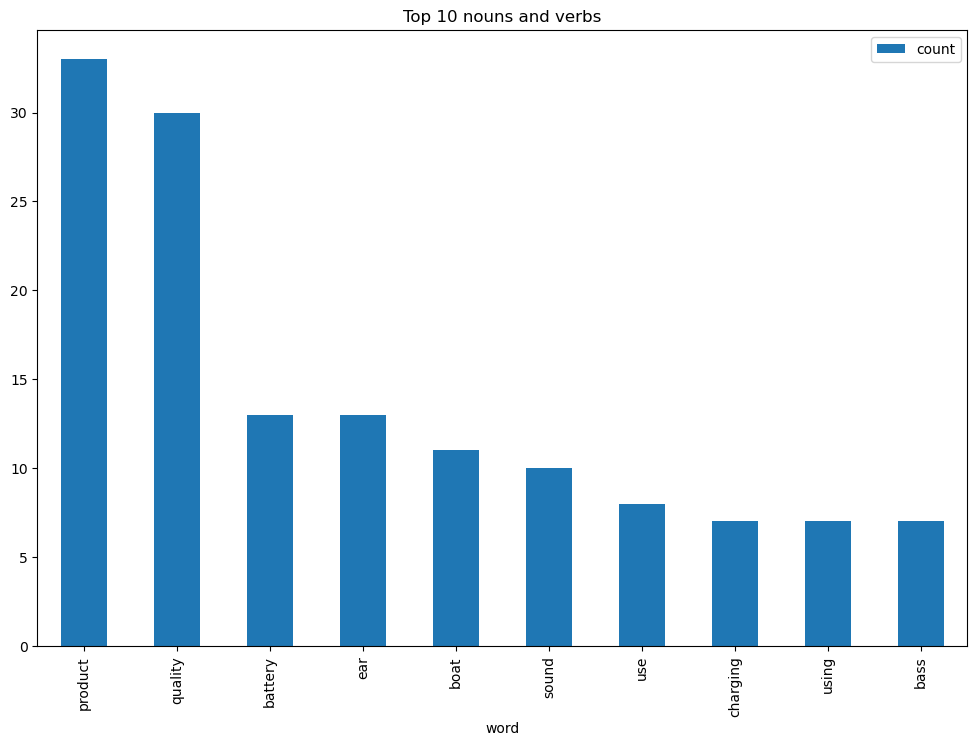

In [31]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

### Performing sentiment analysis on each review using TextBlob

In [32]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity
    if Sentiment > 0:
        return 'positive'
    elif Sentiment < 0:
        return 'negative'
    else:
        return 'neutral'


data["Sentiment"] = data["Reviews"].apply(get_sentiment)
data

Reviewer Name                                            Reviews  \
0   Shokeenism Reviews  brought boat wireless headphones multiple time...   
1      Amazon Customer  overall excellent product price love dual pari...   
2   Shokeenism Reviews  full marks sound qualitydual connectivity plus...   
3                   RK  good product everyone cant bear use warm weath...   
4        Brijesh Mehta  im writing review using product 10 mnthsprosth...   
..                 ...                                                ...   
85                Anil                          bahut sundar aur acha bhi   
86      Ramesh Salokhe                                 nice sound durable   
87         G. Santoshi                                           delicate   
88               rohan                                working really well   
89               rohan  earphone good perfect searching ofr durable be...   

    char_count  avg_word  Sentiment  
0          614  7.661972   0.083333  
1          263  6.135135   0.055729  
2          113  6.600000   0.337500  
3           77  5.000000   0.650000  
4          255  6.314286   0.460417  
..         ...       ...        ...  
85          25  4.200000   0.000000  
86          18  5.333333   0.500000  
87           8  8.000000  -0.300000  
88          19  5.666667   0.200000  
89         291  5.636364   0.200000  

[90 rows x 5 columns]

#### **Creating a word cloud to show the most frequent words in the reviews**

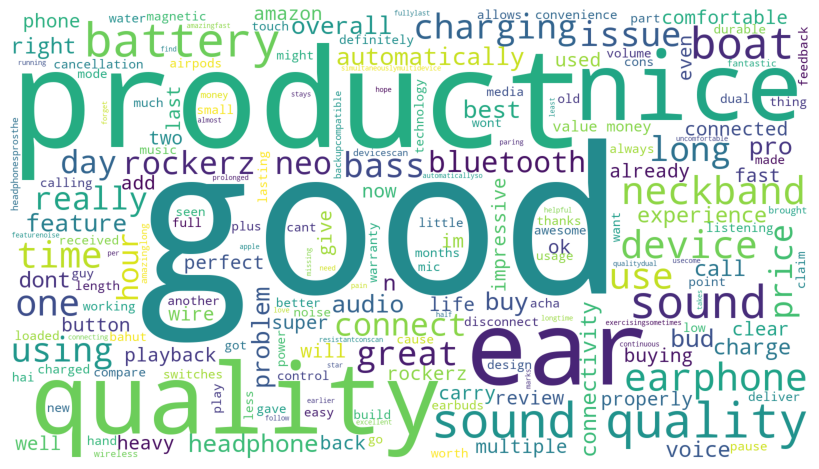

In [33]:
wordcloud = WordCloud(width=1600, height=900, background_color="white", min_font_size=10).generate(" ".join(data["Reviews"]))
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<AxesSubplot:xlabel='Sentiment', ylabel='Count'>

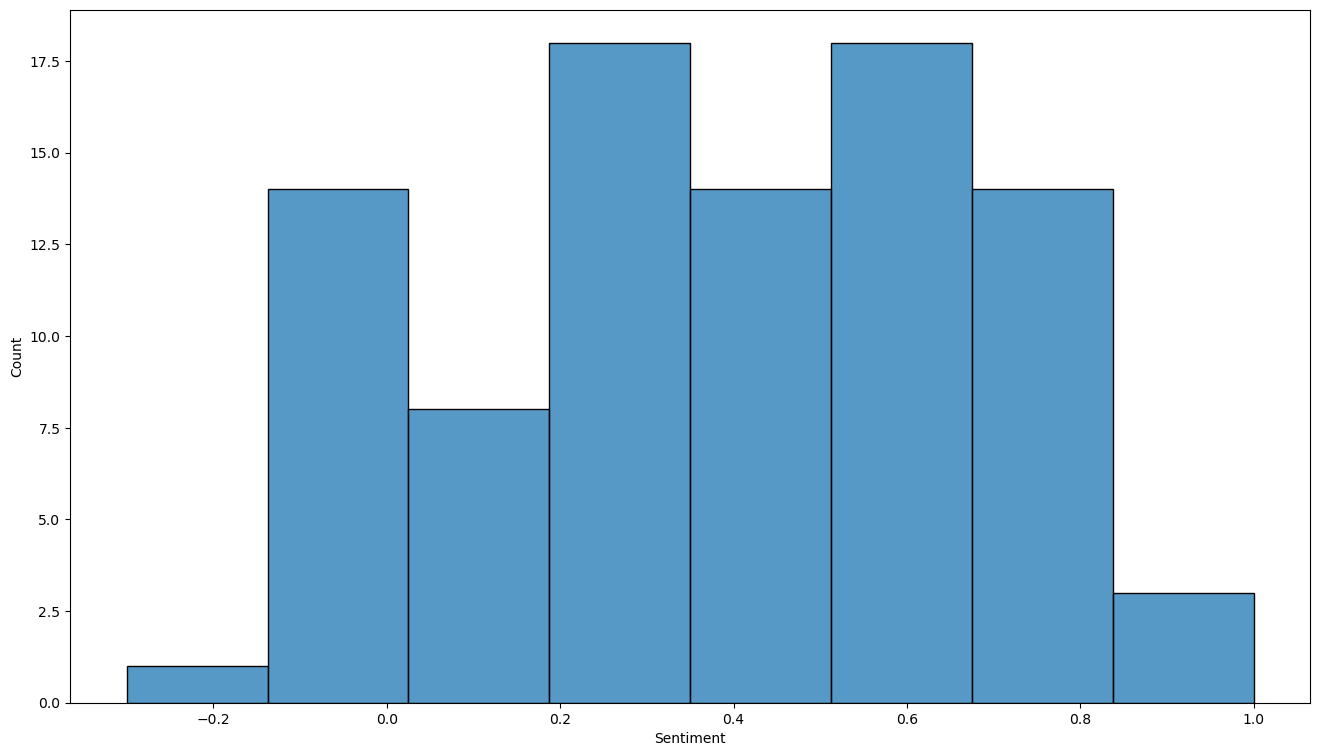

In [36]:
plt.figure(figsize=(16, 9))
sns.histplot(data['Sentiment'])

In [37]:
type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=data['Sentiment'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

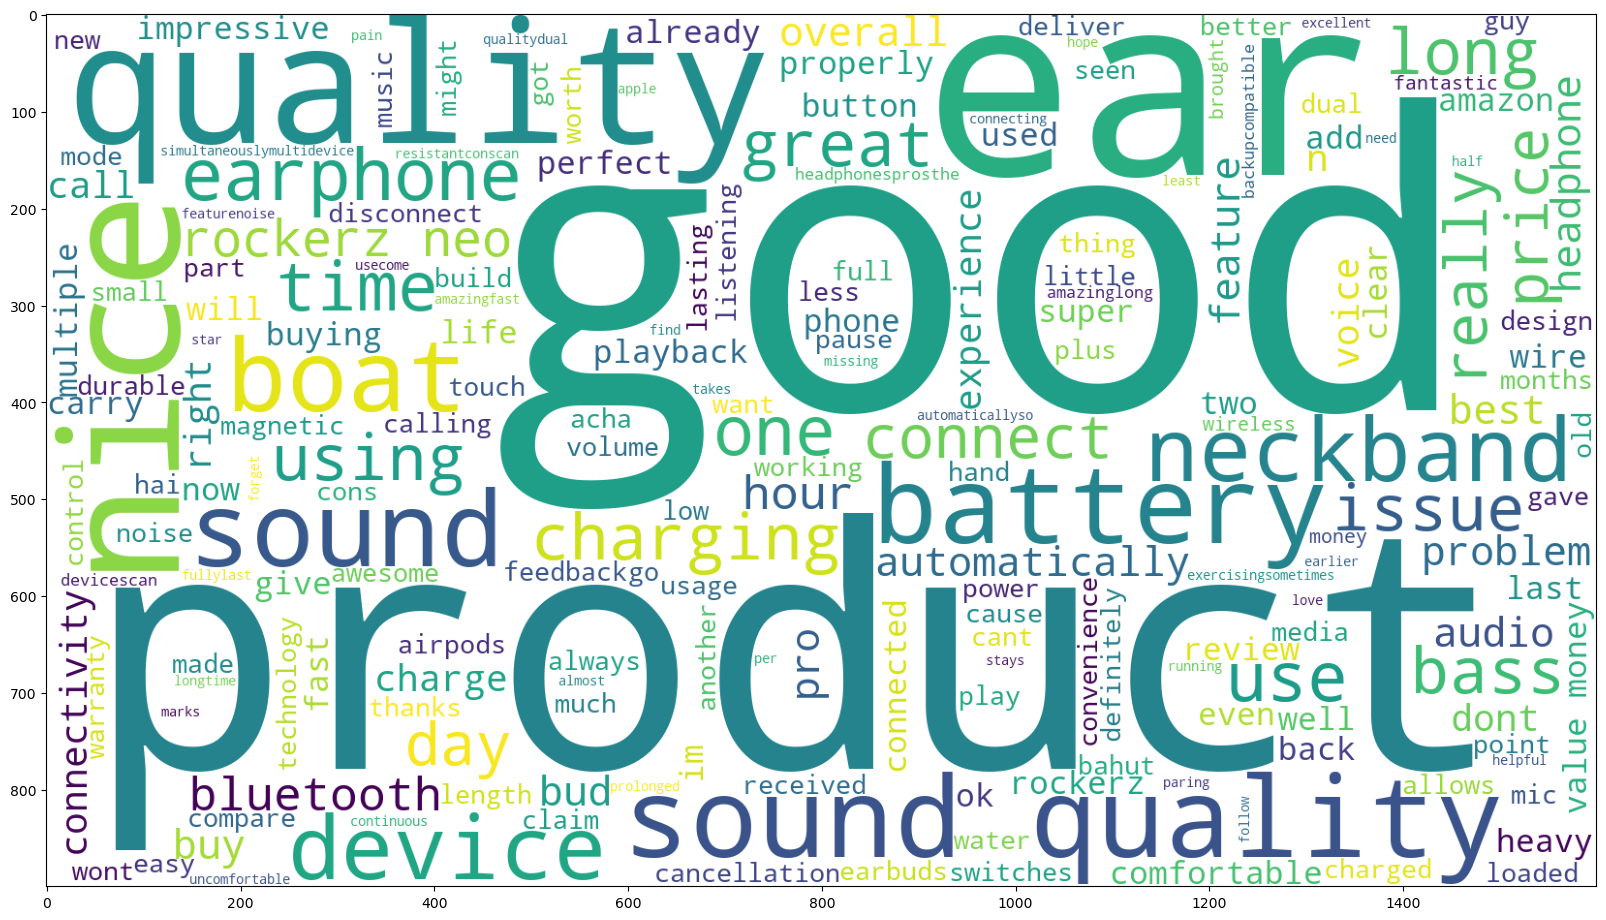

In [42]:
allWords_ = ' '.join([review for review in data[:500]['Reviews']])
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'white',
        width = 1600,
        height =900).generate(allWords_)
plt.imshow(wordcloud)

#### **Most common words in positive Review**

In [39]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=1600, height=900, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(16, 9))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

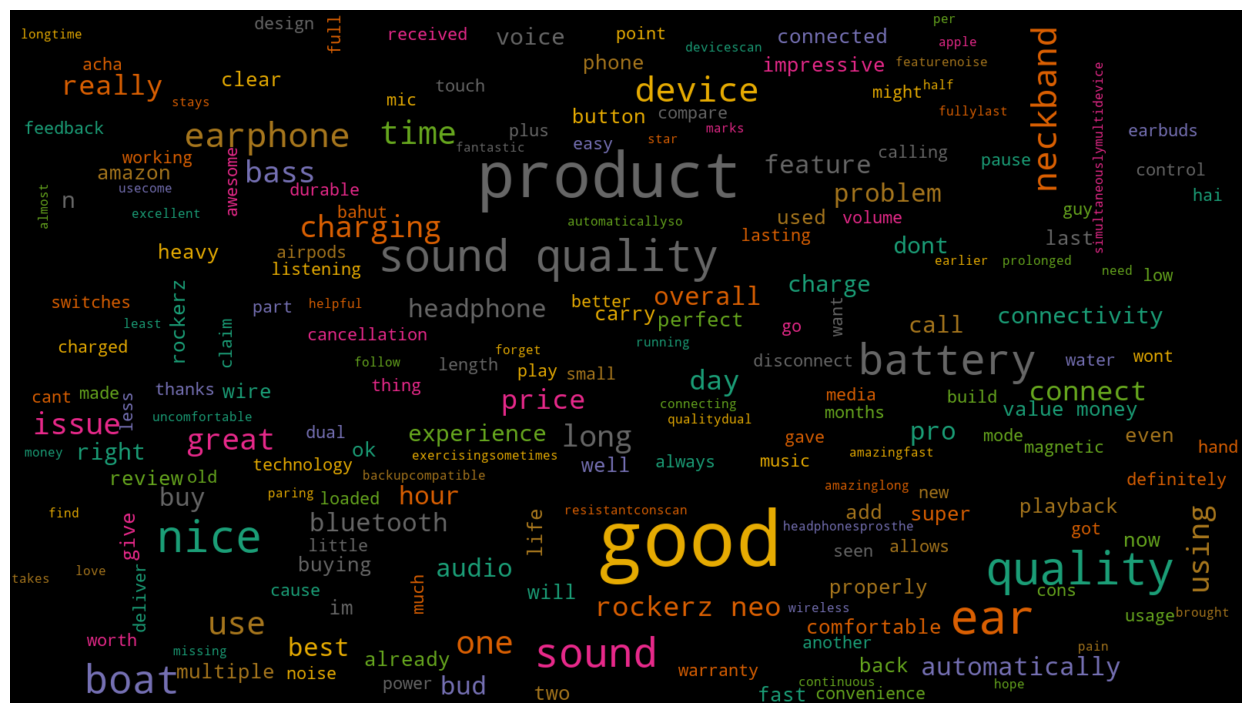

In [45]:
all_words = ' '.join([text for text in data['Reviews']])
generate_wordcloud(all_words)